In [3]:
import pandas as pd
import numpy as np
import dateutil

In [2]:
df_phone = pd.read_csv("data/phone_data.csv")
df_phone.head()

index            date  duration  item    month   network network_type
0      0  15/10/14 06:58    34.429  data  2014-11      data         data
1      1  15/10/14 06:58    13.000  call  2014-11  Vodafone       mobile
2      2  15/10/14 14:46    23.000  call  2014-11    Meteor       mobile
3      3  15/10/14 14:48     4.000  call  2014-11     Tesco       mobile
4      4  15/10/14 17:27     4.000  call  2014-11     Tesco       mobile

In [4]:
# 날짜 데이터를 object 에서 datetime으로 변경
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True)
df_phone.head()

index                date  duration  item    month   network network_type
0      0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1      1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2      2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3      3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4      4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile

In [8]:
df_phone.groupby("month")['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

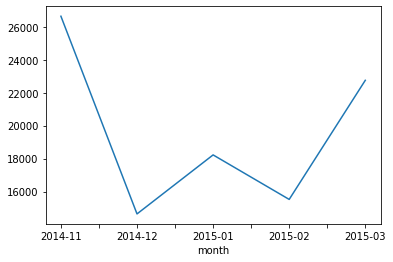

In [6]:
import matplotlib.pyplot as plt

df_phone.groupby("month")['duration'].sum().plot()

<AxesSubplot:xlabel='month'>

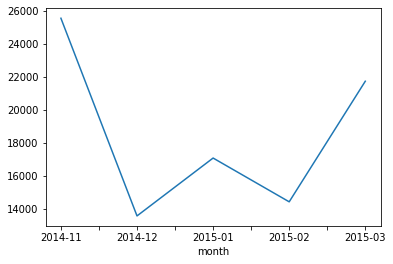

In [9]:
df_phone[df_phone['item'] == "call"].groupby("month")['duration'].sum().plot()

<AxesSubplot:xlabel='month'>

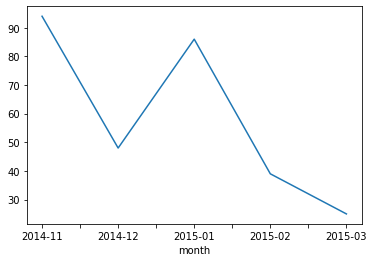

In [11]:
df_phone[df_phone['item'] == "sms"].groupby("month")['duration'].sum().plot()

In [12]:
df_phone.groupby(["month", "item"])['duration'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: duration, dtype: int64

In [13]:
df_phone.groupby(["month", "item"])['duration'].count().unstack()

item     call  data  sms
month                   
2014-11   107    29   94
2014-12    79    30   48
2015-01    88    31   86
2015-02    67    31   39
2015-03    47    29   25

<AxesSubplot:xlabel='month'>

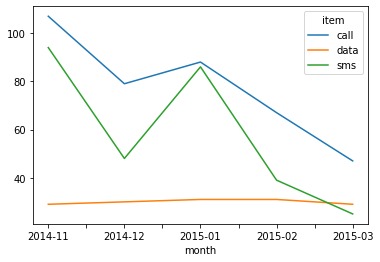

In [14]:
df_phone.groupby(["month", "item"])['duration'].count().unstack().plot()

In [15]:
df_phone.groupby("month", as_index=False).agg({"duration":"sum"})

month   duration
0  2014-11  26639.441
1  2014-12  14641.870
2  2015-01  18223.299
3  2015-02  15522.299
4  2015-03  22750.441

In [16]:
df_phone.groupby("month").agg({"duration":"sum"}).reset_index()

month   duration
0  2014-11  26639.441
1  2014-12  14641.870
2  2015-01  18223.299
3  2015-02  15522.299
4  2015-03  22750.441

In [19]:
df_phone.groupby(["month", "item"]).agg(
    {
        "duration":sum,
        "network_type":"count",
        "date":"first"})

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [18]:
df_phone.groupby(["month", "item"]).agg(
    {
        "duration":[min, max, sum],
        "network_type":"count",
        "date":[min, "first", 'nunique']})

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [21]:
grouped = df_phone.groupby('month').agg({"duration":[min, max, np.mean]})

grouped.columns = grouped.columns.droplevel(level=0)
grouped.rename(columns={"min":"min_duration", "max":"max_duration","mean":"mean_duration"})

min_duration  max_duration  mean_duration
month                                             
2014-11           1.0        1940.0     115.823657
2014-12           1.0        2120.0      93.260318
2015-01           1.0        1859.0      88.894141
2015-02           1.0        1863.0     113.301453
2015-03           1.0       10528.0     225.251891

In [25]:
grouped = grouped.add_prefix("duration_")
grouped.add_suffix("_test")

duration_min_test  duration_max_test  duration_mean_test
month                                                            
2014-11                1.0             1940.0          115.823657
2014-12                1.0             2120.0           93.260318
2015-01                1.0             1859.0           88.894141
2015-02                1.0             1863.0          113.301453
2015-03                1.0            10528.0          225.251891

### Pivot table

In [27]:
# 값:duration   가로축:item   세로축:network
df_phone.pivot_table(values = ['duration'],
                     index = [df_phone.month, df_phone.item],
                     columns = df_phone.network,
                     aggfunc = "sum",
                     fill_value = 0)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

In [28]:
df_phone.groupby(['month','item','network'])['duration'].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

### Crosstab

In [29]:
df_movie = pd.read_csv("data/movie_rating.csv")
df_movie.head()

critic               title  rating
0  Jack Matthews   Lady in the Water     3.0
1  Jack Matthews   Snakes on a Plane     4.0
2  Jack Matthews   You Me and Dupree     3.5
3  Jack Matthews    Superman Returns     5.0
4  Jack Matthews  The Night Listener     3.0

In [30]:
df_movie.pivot_table(
    ['rating'],
    index=df_movie.critic,
    columns=df_movie.title,
    aggfunc='sum',
    fill_value=0
)

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               0.0               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          0.0               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   0.0               0.0               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                0.0               1.0

In [31]:
pd.crosstab(
    index=df_movie.critic,
    columns=df_movie.title,
    values=df_movie.rating,
    aggfunc="first"
).fillna(0)

title          Just My Luck  Lady in the Water  Snakes on a Plane  \
critic                                                              
Claudia Puig            3.0                0.0                3.5   
Gene Seymour            1.5                3.0                3.5   
Jack Matthews           0.0                3.0                4.0   
Lisa Rose               3.0                2.5                3.5   
Mick LaSalle            2.0                3.0                4.0   
Toby                    0.0                0.0                4.5   

title          Superman Returns  The Night Listener  You Me and Dupree  
critic                                                                  
Claudia Puig                4.0                 4.5                2.5  
Gene Seymour                5.0                 3.0                3.5  
Jack Matthews               5.0                 3.0                3.5  
Lisa Rose                   3.5                 3.0                2.5  
Mick LaSalle                3.0                 3.0                2.0  
Toby                        4.0                 0.0                1.0

In [34]:
df_movie.groupby(['critic', 'title']).agg({'rating':'first'}).unstack().fillna(0)

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               0.0               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          0.0               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   0.0               0.0               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                0.0               1.0

### Merge

In [35]:
raw_data = {
    "subject_id":["1","2","3","4","5","7","8","9","10","11"],
    "test_score":[51, 15, 15, 61, 16, 14, 15, 1, 61, 16]
}

df_a = pd.DataFrame(raw_data, columns=['subject_id', 'test_score'])
df_a

subject_id  test_score
0          1          51
1          2          15
2          3          15
3          4          61
4          5          16
5          7          14
6          8          15
7          9           1
8         10          61
9         11          16

In [36]:
raw_data = {
    "subject_id":["4","5","6","7","8"],
    "first_name":["Billy", "Brian", "Bran", "Bryce", "Betty"],
    "last_name":["Bonder", "Black", "Balwner", "Brice", "Btisan"]
}

df_b = pd.DataFrame(raw_data, columns=['subject_id', 'first_name', 'last_name'])
df_b

subject_id first_name last_name
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan

In [37]:
pd.merge(df_a, df_b, on="subject_id")

subject_id  test_score first_name last_name
0          4          61      Billy    Bonder
1          5          16      Brian     Black
2          7          14      Bryce     Brice
3          8          15      Betty    Btisan

In [38]:
pd.merge(df_a, df_b, left_on="subject_id", right_on="subject_id")

subject_id  test_score first_name last_name
0          4          61      Billy    Bonder
1          5          16      Brian     Black
2          7          14      Bryce     Brice
3          8          15      Betty    Btisan

In [39]:
pd.merge(df_a, df_b, on="subject_id", how="left")

subject_id  test_score first_name last_name
0          1          51        NaN       NaN
1          2          15        NaN       NaN
2          3          15        NaN       NaN
3          4          61      Billy    Bonder
4          5          16      Brian     Black
5          7          14      Bryce     Brice
6          8          15      Betty    Btisan
7          9           1        NaN       NaN
8         10          61        NaN       NaN
9         11          16        NaN       NaN

In [40]:
pd.merge(df_a, df_b, on="subject_id", how="right")

subject_id  test_score first_name last_name
0          4        61.0      Billy    Bonder
1          5        16.0      Brian     Black
2          6         NaN       Bran   Balwner
3          7        14.0      Bryce     Brice
4          8        15.0      Betty    Btisan

In [42]:
pd.merge(df_a, df_b, on="subject_id", how="inner")

subject_id  test_score first_name last_name
0          4          61      Billy    Bonder
1          5          16      Brian     Black
2          7          14      Bryce     Brice
3          8          15      Betty    Btisan

In [43]:
pd.merge(df_a, df_b, on="subject_id", how="outer")

subject_id  test_score first_name last_name
0           1        51.0        NaN       NaN
1           2        15.0        NaN       NaN
2           3        15.0        NaN       NaN
3           4        61.0      Billy    Bonder
4           5        16.0      Brian     Black
5           7        14.0      Bryce     Brice
6           8        15.0      Betty    Btisan
7           9         1.0        NaN       NaN
8          10        61.0        NaN       NaN
9          11        16.0        NaN       NaN
10          6         NaN       Bran   Balwner

In [44]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

subject_id_x  test_score subject_id_y first_name last_name
0            1          51            4      Billy    Bonder
1            2          15            5      Brian     Black
2            3          15            6       Bran   Balwner
3            4          61            7      Bryce     Brice
4            5          16            8      Betty    Btisan

### Concat

In [45]:
raw_data = {
    "subject_id":["1","2","3","4","5"],
    "first_name":["Alex", "Amy", "Allen", "Alice", "Ayoung"],
    "last_name":["Anderson", "Ackerman", "Ali", "Aoni", "Atiches"]
}

df_c = pd.DataFrame(raw_data, columns=['subject_id', 'first_name', 'last_name'])
df_c

subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches

In [52]:
df_new = pd.concat([df_c, df_b])
# df_new
df_new.reset_index(drop=True)

subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan

In [53]:
df_c.append(df_b)

subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan

In [55]:
df_new = pd.concat([df_c, df_b], axis=1)
df_new
df_new.reset_index(drop=True)

subject_id first_name last_name subject_id first_name last_name
0          1       Alex  Anderson          4      Billy    Bonder
1          2        Amy  Ackerman          5      Brian     Black
2          3      Allen       Ali          6       Bran   Balwner
3          4      Alice      Aoni          7      Bryce     Brice
4          5     Ayoung   Atiches          8      Betty    Btisan

### Case

In [67]:
import os

files = [file_name for file_name in os.listdir("data/xlsx") if file_name.endswith("xlsx")]
files

['customer-status.xlsx',
 'sales-feb-2014.xlsx',
 'sales-jan-2014.xlsx',
 'sales-mar-2014.xlsx']

In [68]:
files = sorted(files)

In [69]:
df_list = [os.path.join("data/xlsx", df_filename) for df_filename in files]
df_list

['data/xlsx\\customer-status.xlsx',
 'data/xlsx\\sales-feb-2014.xlsx',
 'data/xlsx\\sales-jan-2014.xlsx',
 'data/xlsx\\sales-mar-2014.xlsx']

In [72]:
df_list = [pd.read_excel(os.path.join("data/xlsx", df_filename)) for df_filename in files]
df_list[0]

account number                             name  status
0           740150                       Barton LLC    gold
1           714466                  Trantow-Barrows  silver
2           218895                        Kulas Inc  bronze
3           307599      Kassulke, Ondricka and Metz  bronze
4           412290                    Jerde-Hilpert  bronze
5           729833                        Koepp Ltd  silver
6           146832                     Kiehn-Spinka  silver
7           688981                      Keeling LLC  silver
8           786968         Frami, Hills and Schmidt  silver
9           239344                       Stokes LLC    gold
10          672390                  Kuhn-Gusikowski  silver
11          141962                       Herman LLC    gold
12          424914                    White-Trantow  silver
13          527099                 Sanford and Sons  bronze
14          642753                      Pollich LLC  bronze
15          257198  Cronin, Oberbrunner and Spencer    gold

In [73]:
status = df_list[0]
sales = pd.concat(df_list[1:])
sales

account number                          name       sku  quantity  \
0            383080                      Will LLC  B1-20000         7   
1            412290                 Jerde-Hilpert  S1-27722        11   
2            412290                 Jerde-Hilpert  B1-86481         3   
3            412290                 Jerde-Hilpert  B1-20000        23   
4            672390               Kuhn-Gusikowski  S1-06532        48   
..              ...                           ...       ...       ...   
137          737550  Fritsch, Russel and Anderson  B1-65551        12   
138          642753                   Pollich LLC  S1-93683        21   
139          412290                 Jerde-Hilpert  B1-20000        30   
140          307599   Kassulke, Ondricka and Metz  S2-16558        46   
141          672390               Kuhn-Gusikowski  B1-04202        19   

     unit price  ext price                 date  
0         33.69     235.83  2014-02-01 09:04:59  
1         21.12     232.32  2014-02-01 11:51:46  
2         35.99     107.97  2014-02-01 17:24:32  
3         78.90    1814.70  2014-02-01 19:56:48  
4         55.82    2679.36  2014-02-02 03:45:20  
..          ...        ...                  ...  
137       56.24     674.88  2014-03-31 08:43:24  
138       92.57    1943.97  2014-03-31 11:37:34  
139       22.38     671.40  2014-03-31 21:41:31  
140       56.04    2577.84  2014-03-31 22:11:22  
141       27.86     529.34  2014-03-31 23:13:14  

[384 rows x 7 columns]

In [76]:
merge_df = pd.merge(status, sales, how='left', on="account number")
merge_df.head()

account number      name_x status      name_y       sku  quantity  \
0          740150  Barton LLC   gold  Barton LLC  S1-93683        21   
1          740150  Barton LLC   gold  Barton LLC  S2-10342        47   
2          740150  Barton LLC   gold  Barton LLC  B1-38851         3   
3          740150  Barton LLC   gold  Barton LLC  B1-20000        28   
4          740150  Barton LLC   gold  Barton LLC  B1-38851        17   

   unit price  ext price                 date  
0       10.34     217.14  2014-02-07 08:34:50  
1       96.68    4543.96  2014-02-12 03:36:52  
2       79.49     238.47  2014-02-12 05:09:16  
3       81.39    2278.92  2014-02-15 07:45:16  
4       81.22    1380.74  2014-02-17 17:12:16

In [77]:
del merge_df["name_x"]

In [78]:
merge_df.groupby(["status", "name_y"])["quantity", "ext price"].sum().reset_index().sort_values(by=['status', 'quantity'], ascending=False)

C:\Users\DAUNJEON\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


status                           name_y  quantity  ext price
14  silver                  Trantow-Barrows       643   35354.61
13  silver                  Kuhn-Gusikowski       558   29994.43
15  silver                    White-Trantow       556   34070.80
10  silver                      Keeling LLC       438   27341.41
11  silver                     Kiehn-Spinka       350   21027.06
9   silver         Frami, Hills and Schmidt       338   19634.31
12  silver                        Koepp Ltd       315   17381.89
6     gold  Cronin, Oberbrunner and Spencer       543   26809.63
8     gold                       Stokes LLC       449   25680.43
7     gold                       Herman LLC       417   22940.82
5     gold                       Barton LLC       346   21909.13
2   bronze                        Kulas Inc       738   53507.36
0   bronze                    Jerde-Hilpert       581   30617.51
4   bronze                 Sanford and Sons       403   24003.93
1   bronze      Kassulke, Ondricka and Metz       366   20543.71
3   bronze                      Pollich LLC       219    9298.02

### Persistance

In [79]:
# Database connection
import sqlite3

conn = sqlite3.connect("data/flights.db")
cur = conn.cursor()
cur.execute("select * from airlines limit 5;")
results = cur.fetchall()
results

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'),
 (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N'),
 (2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y'),
 (3,
  '4',
  '2 Sqn No 1 Elementary Flying Training School',
  '\\N',
  None,
  'WYT',
  None,
  'United Kingdom',
  'N'),
 (4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N')]

In [80]:
df_airlines = pd.read_sql_query("select * from airlines;", conn)
df_airports = pd.read_sql_query("select * from airports;", conn)
df_routes = pd.read_sql_query("select * from routes;", conn)

### XLS persistence

In [81]:
!pip install openpyxl XlsxWriter

You should consider upgrading via the 'c:\users\daunjeon\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [82]:
writer = pd.ExcelWriter("data/df_routes.xlsx", engine="xlsxwriter")
df_routes.to_excel(writer, sheet_name="Sheet1")

In [83]:
df_routes.to_pickle("data/df_routes.pickle")

In [84]:
df_routes_pickle = pd.read_pickle("data/df_routes.pickle")
df_routes_pickle.head()

index airline airline_id source source_id dest dest_id codeshare stops  \
0      0      2B        410    AER      2965  KZN    2990      None     0   
1      1      2B        410    ASF      2966  KZN    2990      None     0   
2      2      2B        410    ASF      2966  MRV    2962      None     0   
3      3      2B        410    CEK      2968  KZN    2990      None     0   
4      4      2B        410    CEK      2968  OVB    4078      None     0   

  equipment  
0       CR2  
1       CR2  
2       CR2  
3       CR2  
4       CR2

In [85]:
df_routes_pickle.describe()

index
count  67663.000000
mean   33831.000000
std    19532.769969
min        0.000000
25%    16915.500000
50%    33831.000000
75%    50746.500000
max    67662.000000